## Feedback

### 1. Bias and variance of ridge regression

<div style="color: green; font-weight:bold">
Expectation of β:
<br>
- They use the ridge regression solution obtained in the lecture (without repeating the derivation of it).
<br>
- They correctly substitute y and take the expectation (as in the sample solution) of the estimated β.
<br>
- Finally, they correctly use the fact that the expectation of ε is 0 and arrive at the desired result (as in the sample solution.)
<br>
Covariance of β:
<br>
- Missing proof.
</div>

### 2. LDA-Derivation from the Least Squares Error

<div style="color: green; font-weight:bold">
- The derivative they obtain in the first row is almost correct (insteaf of -2X_i^T they have -2X_i).
<br>
- Their calculations for X^TX are not entirely correct (see the equality marked with a blue arrow). They neglect all the terms multiplied with one of the class means.
<br>
- Their proof of equation (2) is not complete.
</div>

In [1]:
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt

# 3.1

In [2]:
def omp_regression(X, y, T = 2):
    '''
    X ∈  R^(N x D)
    y ∈ R^(N)
    T > 0: desired number of non-zero elements in the final solution beta
    '''
    N, D = X.shape
    A = []
    B = list(range(D))
    r = y
    solutions = np.zeros((D, T))

    for t in range(T):
        # Find the inactive column with the maximum correlation with the residual
        correlations = np.abs(np.dot(X.T, r))
        j = B[np.argmax(correlations[B])]

        # Move j from B to A
        A.append(j)
        B.remove(j)
        
        # Form the active matrix
        X_A = X[:, A]
        
        # get beta
        beta_A = np.linalg.lstsq(X_A, y, rcond=None)[0]
        
        # Update the residual
        r = y - np.dot(X_A, beta_A)
        
        # Store the solution
        solution = np.zeros(D)
        solution[A] = beta_A
        solutions[:, t] = solution

    return solutions    

In [3]:
# test 
X = np.array([[1, 0, 2, 0, 0],
              [0, 1, 0, 3, 0],
              [1, 0, 2, 0, 0],
              [0, 1, 0, 3, 0]])

y = np.array([3, 3, 3, 3])

solutions = omp_regression(X, y, 2)
print(solutions)

[[0.  0. ]
 [0.  0. ]
 [0.  1.5]
 [1.  1. ]
 [0.  0. ]]


# 3.2

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load data
digits = load_digits()
data = digits["data"]
target = digits["target"]

# Use only digits 3 and 9 and relabel data
num_1, num_2 = 3, 9
mask = np.logical_or(target == num_1, target == num_2)
data = data[mask] / data.max() 
target = target[mask]
target[target == num_1] = 1
target[target == num_2] = -1

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

t = 1, error rate = 0.4932
t = 2, error rate = 0.1233
t = 3, error rate = 0.0479
t = 4, error rate = 0.0479
t = 5, error rate = 0.0205
t = 6, error rate = 0.0205
t = 7, error rate = 0.0205
t = 8, error rate = 0.0137
t = 9, error rate = 0.0274
t = 10, error rate = 0.0068
t = 11, error rate = 0.0068
t = 12, error rate = 0.0068
t = 13, error rate = 0.0
t = 14, error rate = 0.0
t = 15, error rate = 0.0
t = 16, error rate = 0.0
t = 17, error rate = 0.0
t = 18, error rate = 0.0
t = 19, error rate = 0.0
t = 20, error rate = 0.0137
t = 21, error rate = 0.0137
t = 22, error rate = 0.0137
t = 23, error rate = 0.0068
t = 24, error rate = 0.0
t = 25, error rate = 0.0
t = 26, error rate = 0.0
t = 27, error rate = 0.0
t = 28, error rate = 0.0
t = 29, error rate = 0.0
t = 30, error rate = 0.0
t = 31, error rate = 0.0
t = 32, error rate = 0.0
t = 33, error rate = 0.0
t = 34, error rate = 0.0
t = 35, error rate = 0.0
t = 36, error rate = 0.0
t = 37, error rate = 0.0
t = 38, error rate = 0.0
t = 39, err

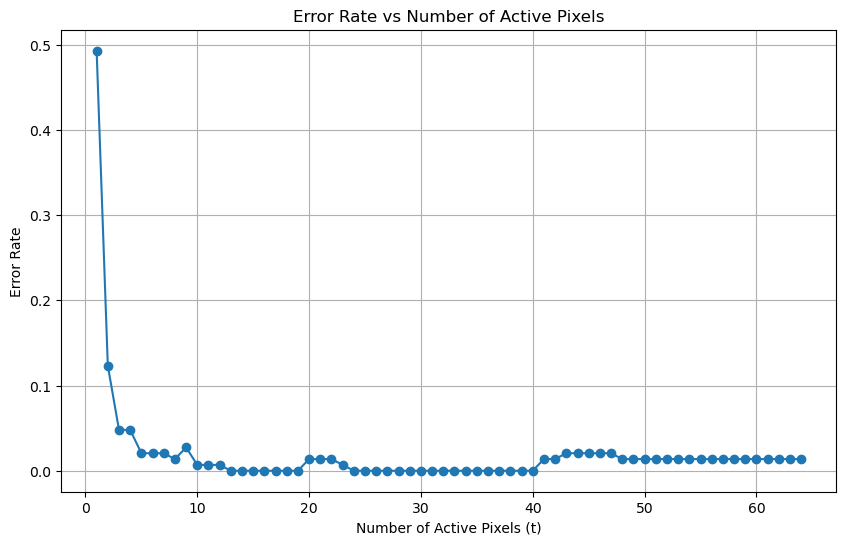

In [5]:
# Train sparse LDA model
T = 64  # Set T to the number of features 
solutions = omp_regression(X_train, y_train, T)

# Evaluate error rate on the test set for each t
error_rates = []
for t in range(T):
    beta_t = solutions[:, t]
    y_pred = np.sign(np.dot(X_test, beta_t))
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)
    print(f"t = {t+1}, error rate = {round(error_rate,4)}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, T+1), error_rates, marker='o')
plt.xlabel('Number of Active Pixels (t)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Number of Active Pixels')
plt.grid(True)
plt.show()

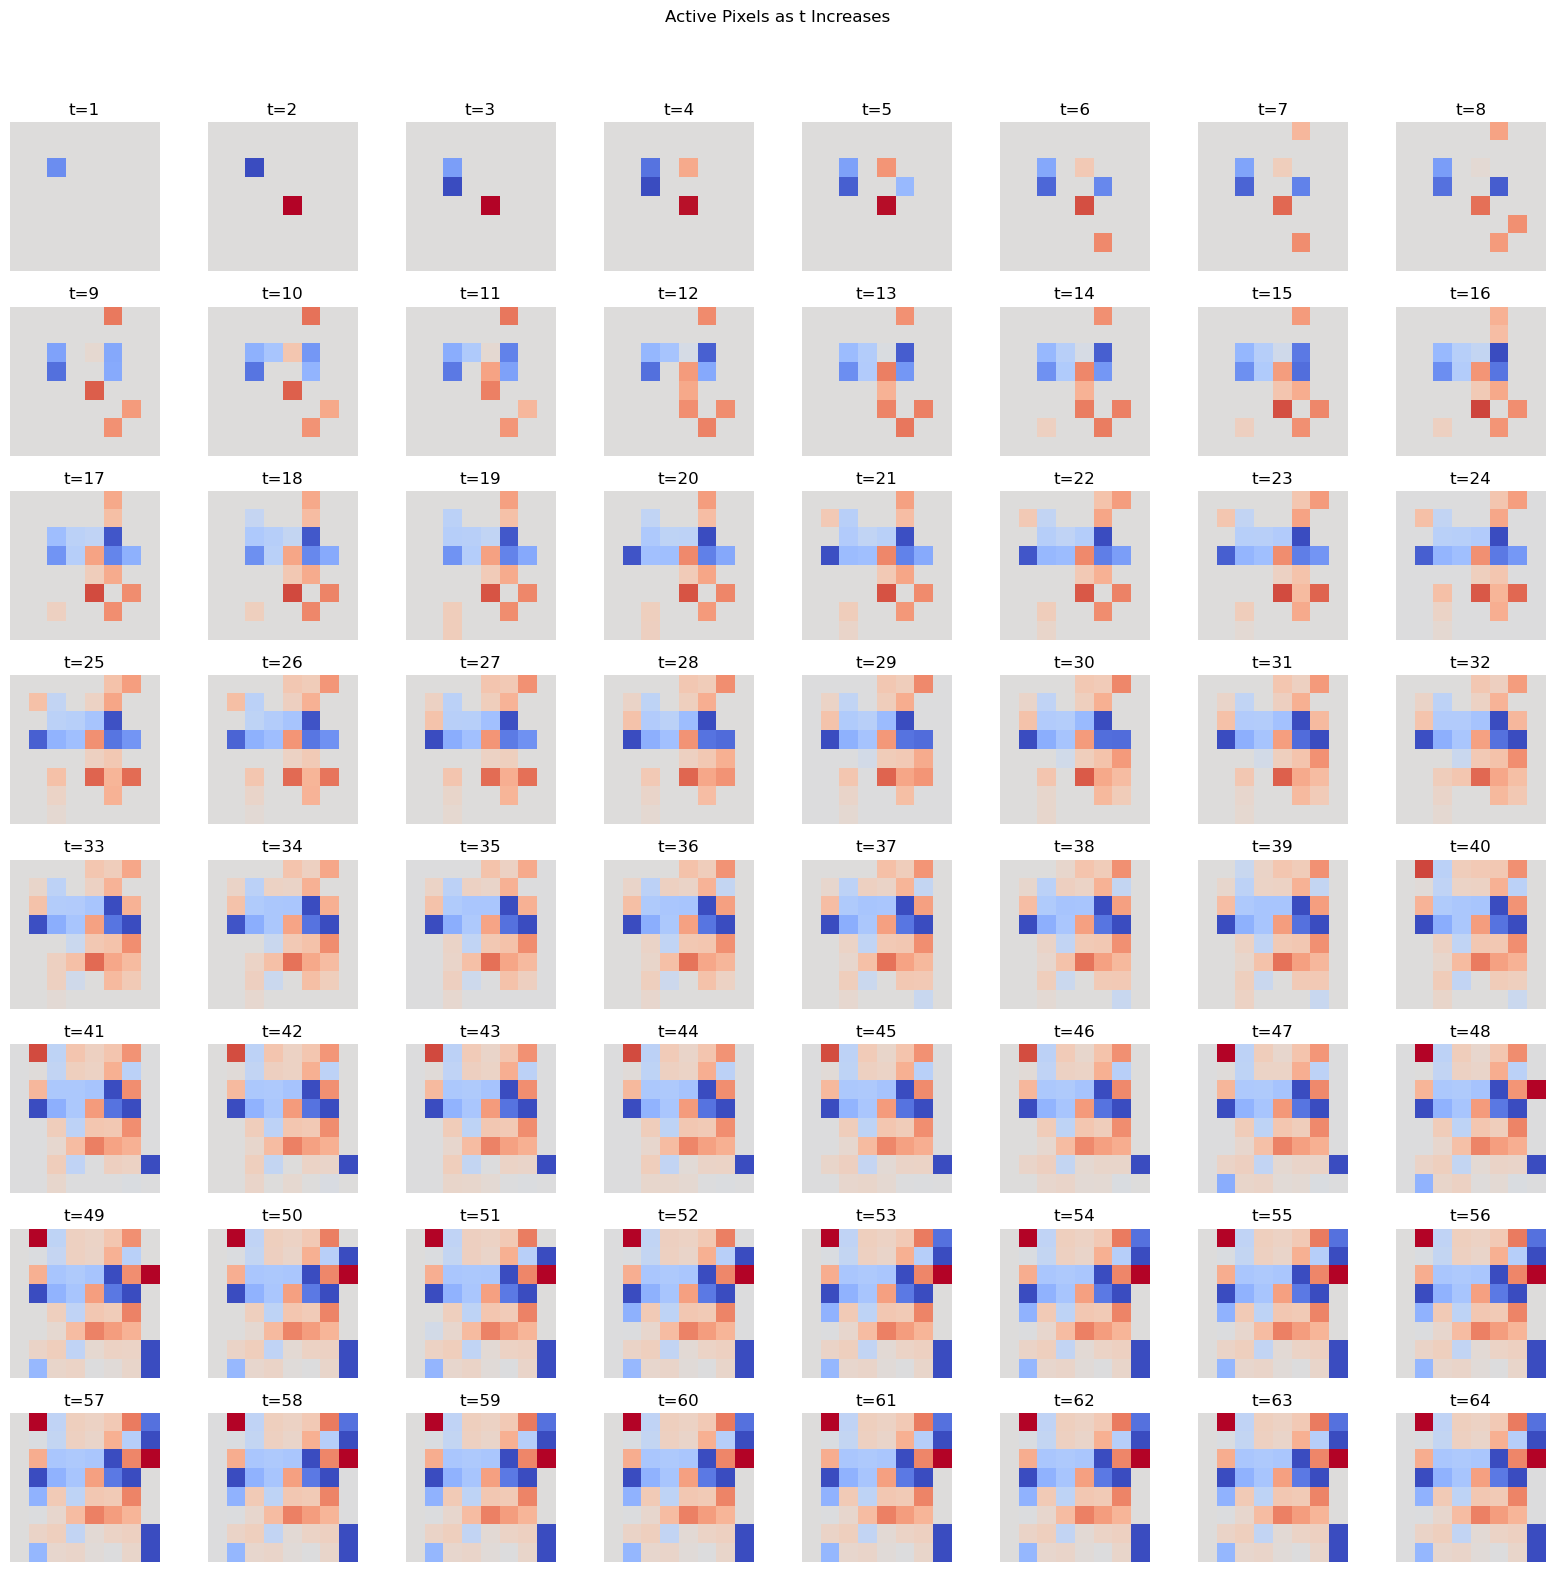

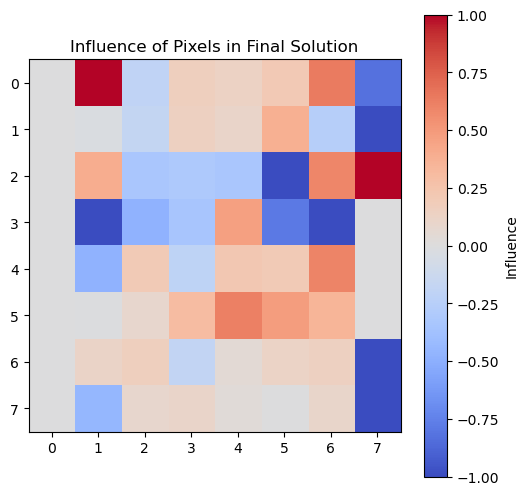

In [6]:
# Visualize active pixels
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
for t in range(T):
    beta_t = solutions[:, t]
    img = beta_t.reshape(8, 8)
    ax = axes[t // 8, t % 8]
    ax.imshow(img, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_title(f't={t+1}')
    ax.axis('off')
plt.suptitle('Active Pixels as t Increases')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Visualize influence of pixels
final_solution = solutions[:, T-1]
influence_img = final_solution.reshape(8, 8)
plt.figure(figsize=(6, 6))
plt.imshow(influence_img, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Influence')
plt.title('Influence of Pixels in Final Solution')
plt.show()

In [8]:
# Compare with hand-crafted feature selection
handcrafted_indices = np.array([20, 45])  # Indices from Exercise 1
omp_indices = np.where(final_solution != 0)[0]
common_indices = np.intersect1d(handcrafted_indices, omp_indices)
print(f"Common feature indices: {common_indices}")


Common feature indices: [20 45]
